# **Breaking The Ice(berg): Would you Survive the Titanic?**

Have you ever wondered if you would survive being on the Titanic at the time of sinking? Well, our project aims to answer that exact question! As many people know, the Titanic was a luxurious British steamship that sank on April 12, 1912 (Tikkanen, 2022). The Titanic was also known as the “Unsinkable Ship”, and was originally meant to sail across the Atlantic, but sank before it could complete its first journey. The sinking of “the most famous shipwreck in our current popular culture” plays a huge part of human history and has become a cultural icon — despite the event being over a century ago (NOAA, 2018). With the help of the dataset from this [link](https://www.kaggle.com/c/titanic), we gained information about everyone who boarded the Titanic, some of their personal details, along with whether or not they survived the sinking. Using this information, our goal is to be able to answer the following question: does age and different social hierarchy characteristics such as ticket class or ticket fare impact your likelihood of surviving the Titanic?


### *Methods*  

We classified the different passengers based on the following factors: age, ticket fare (labelled Fare in the data table), and ticket class (labelled Pclass in the data table). These factors were selected because we suspected that they were the main factors in determining citizen survival. The other factors, such as Sex, Passenger ID, SibSp (number of siblings and spouses aboard), Parch (number of parents and children aboard), Ticket (ticket number), Cabin (cabin number), and Embarked (port of embarkation) did not seem to directly correlate with survivorship. Although we originally suspected sex to play a big role, our research suggested that due to the policy at the time, women were given priority (Hall, 1986). This conflicted with our question of "social hierarchy characteristics" and thus, was not included as a factor. With the determined factors we chose, we will be able to predict whether a specific passenger would survive the sinking of the Titanic. For each of the passengers in the test set, we produced a “yes” or “no” to indicate survivorship based on the chosen factors. To come to our result, we followed the concept of classification for this project. We used classification in order to determine whether a person would survive the sinking of the Titanic based on our dataset. Later in this project, one can see the four plots we represented: 

    1) the percentages of people who survived and did not survive (Figure 1)
    2) Survivorship of passengers based on age (Figure 2)
    3) Survivorship of passengers based on Ticket Class (Figure 3)
    4) Survivorship of passengers based on Ticket Fare (Figure 4)
    
Analyzing these graphs should be able to show us the differences between the traits and the outcome it had on the likelihood of their survival. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(infer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

*Why we did this:* Loading the librarys above was necessary to give us access to the all the functions needed for our code. 

In [2]:
titanic_data <- read.csv("https://raw.githubusercontent.com/rpan01/DSCI-Group-Project/main/train.csv") %>%
   mutate(Sex = as_factor(Sex)) %>%
   mutate(Survived = recode(Survived, "0"="No", "1"="Yes"))
head(titanic_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


*Table 1: Loaded Titanic dataset with all columns*

*Why we did this:* Fairly self-explanatory—in order to plot the graphs and perform a data analysis, we need a data set to work with. It also has to be large enough to build a model off of, and the more data the better for getting accurate predictions.

We agreed that our data was already tidy because each row is one passenger (observation), and each column is a single type of value.

In [3]:
options(repr.plot.width = 10, repr.plot.height = 7)

survived <- titanic_data %>% 
  count(Survived) %>% 
  mutate(Percent = n/sum(n))

titanic_survival_plot <- titanic_data %>%
  ggplot(aes(x = Survived, fill = Survived)) +
  geom_bar() +
  labs(x = "Did the Passenger Survive?", colour = "Survived") +
  ggtitle("Survival Rate of Passengers on Titanic") +
  theme(text=element_text(size=20))

In [4]:
survived 

Survived,n,Percent
<chr>,<int>,<dbl>
No,549,0.6161616
Yes,342,0.3838384


*Table 2: Percent survival with exact numbers*

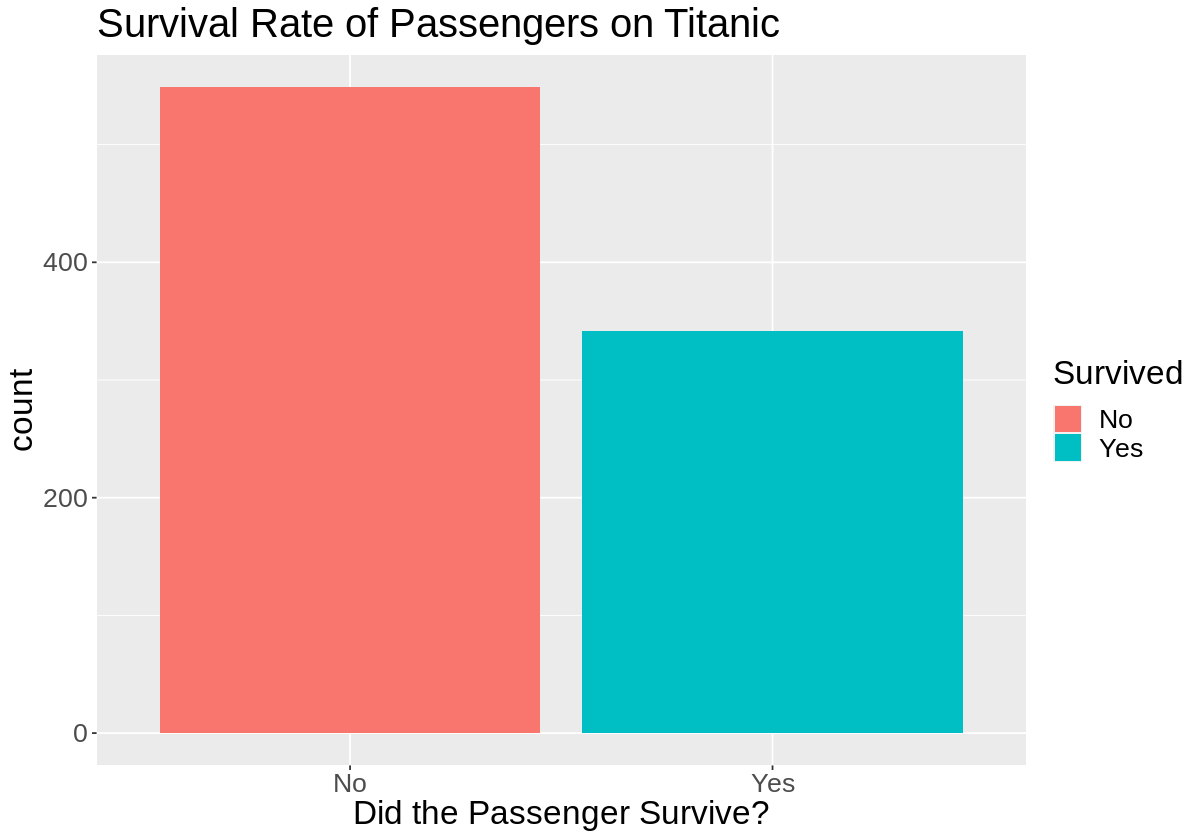

In [5]:
titanic_survival_plot

*Figure 1: Graph of passenger survivorship based on Table 2*

*Why we did this:* The first thing we wanted to see was the overall rate of survival on the Titanic. The graph above shows the ratio of individuals who survived, compared to those who didn't. In summary, approximately 38% of passengers survived, while 62% did not.

In [6]:
set.seed(1111)

titanic_split <- initial_split(titanic_data, prop = 0.75, strata = Survived)  
titanic_train <- training(titanic_split)   
titanic_test <- testing(titanic_split)

In [7]:
head(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,No,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,No,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S


*Table 3a: Beginning of the training data*

In [8]:
tail(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,No,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,No,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,Yes,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,Yes,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,No,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


*Table 3b: End of the training data*

*Why we did this:* To build our classifier, we split the data into training and testing sets because we need the training set to build, fit, and train our model for predictions. Once our training model is built, we used it to make predictions on new data with unknown classifications. The testing set was then used to evaluate the quality of our model, which was done by collecting metrics and seeing how accurate our model was at predicting the assigned values.


In [9]:
titanic_table_mean <- titanic_train %>%
  select(Age, Pclass, Fare) %>%
  map_df(mean, na.rm = TRUE)

passenger_age_ratio <- titanic_train %>%
  mutate(Age = as.double(Age)) %>%
  count("Older than Age 25?" = Age < 25) %>% 
  mutate(Percent = n/sum(n))

passengers_survived <- titanic_train %>% 
  count(Survived) %>% 
  mutate(Percent = n/sum(n))

<Add table here>

In [10]:
titanic_table_mean

Age,Pclass,Fare
<dbl>,<dbl>,<dbl>
29.91229,2.298954,31.31239


*Table 4: Average values for Age, Ticket Class, and Ticket Fare*

In [11]:
passenger_age_ratio

Older than Age 25?,n,Percent
<lgl>,<int>,<dbl>
FALSE,326,0.4872945
TRUE,207,0.3094170
NA,136,0.2032885


*Table 5: Percentage of Passengers Older than 25 and Younger than 25*

In [12]:
passengers_survived

Survived,n,Percent
<chr>,<int>,<dbl>
No,412,0.6158445
Yes,257,0.3841555


*Table 6: Percent Survival of Passengers in Training Data*

*Why we did this:* Before we began coding, we wanted to isolate and analyze the information we already had. We did so by first isolating the three factors that we were analyzing for our project: age, ticket class (Pclass), and ticket cost (Fare). We also looked at the total survival rate from the training set, along with the focused age group (individualds younger than 25). For our training data, the first table demonstrates that the average age of the passengers was 30 years old, the average ticket class was second class, and the average price for the ticket was $31.31. The second table demonstrates that about 49% of passengers were younger than 25 years old, 31% were older, and 20% was of unknown age. Finally, the third table demonstrates that 62% of passengers died, while 38% survived, much like the orginial Titanic Data.

In [13]:
options(repr.plot.width = 15, repr.plot.height = 7)

titanic_age_plot <- titanic_train %>%
  ggplot(aes(x = Age, fill = Survived)) +
  geom_histogram() +
  labs(x = "Age of Passenger", colour = "Survived") +
  ggtitle("Survival of Passengers with Different Ages") +
  theme(text=element_text(size=15))

titanic_class_plot <- titanic_train %>%
  ggplot(aes(x = Pclass, fill = Survived)) +
  geom_bar() +
  labs(x = "Ticket Class of Passenger", colour = "Survived") +
  ggtitle("Survival of Passengers with Different Ticket Classes") +
  theme(text=element_text(size=15))

titanic_fare_plot <- titanic_train %>%
  ggplot(aes(x = Fare, fill = Survived)) +
  geom_histogram() +
  xlim(0,100) +
  ylim(0,100) +
  labs(x = "Ticket Fare of Passenger", colour = "Survived") +
  ggtitle("Survival of Passengers with Different Ticket Costs") +
  theme(text=element_text(size=15))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 136 rows containing non-finite values (stat_bin).”


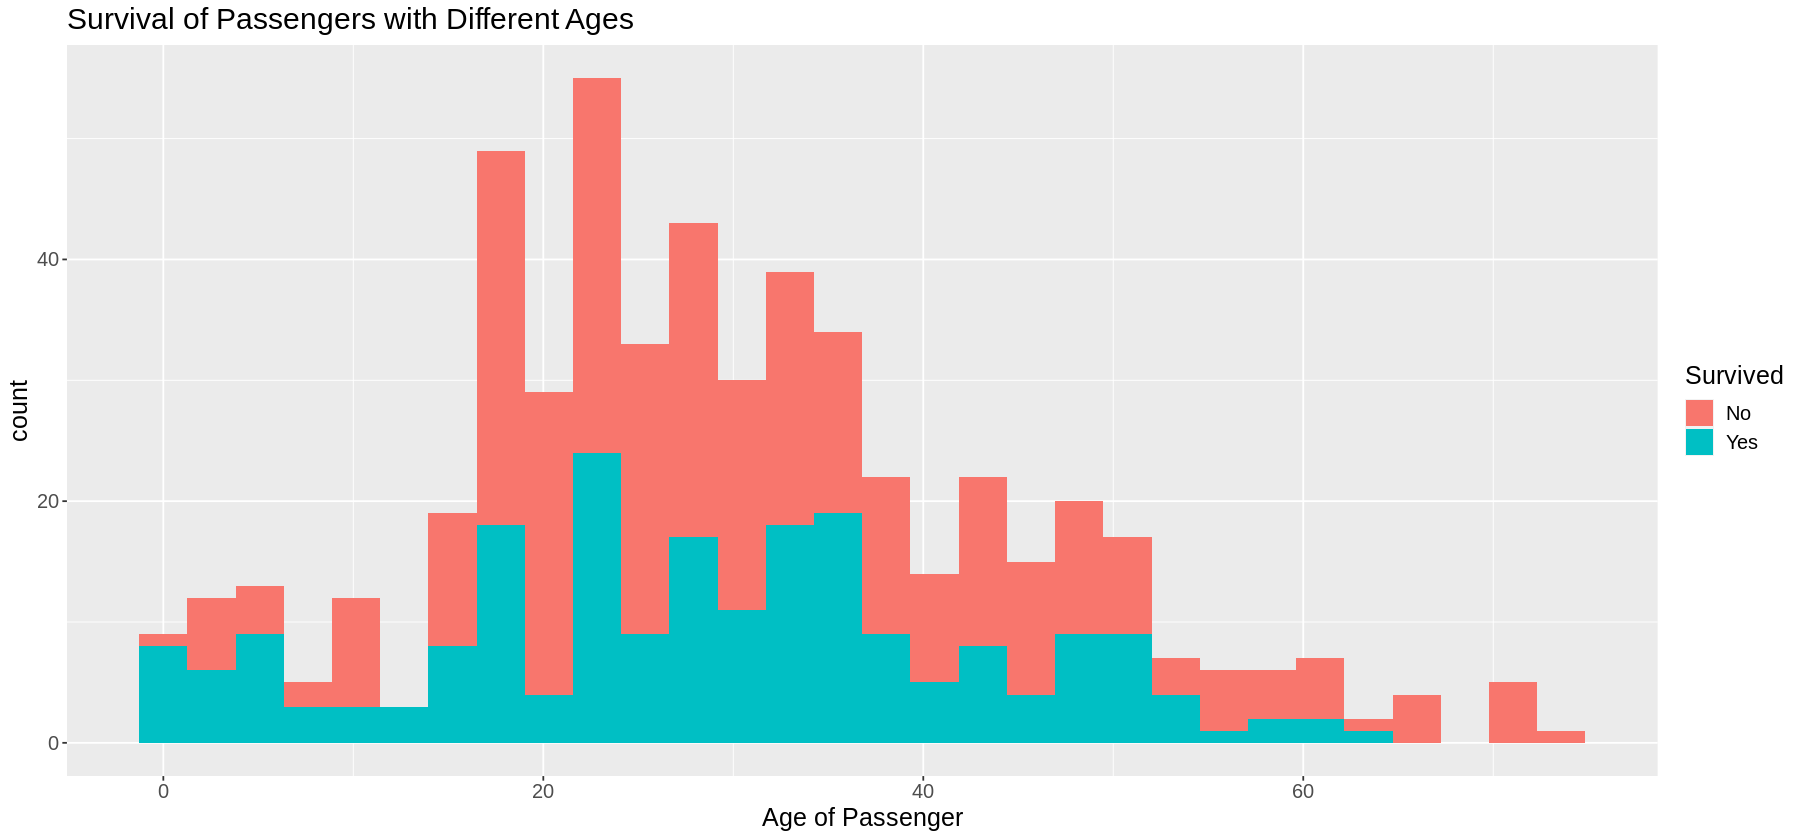

In [14]:
titanic_age_plot

*Figure 2: Visualization of Survivorship of Passengers with varying age*

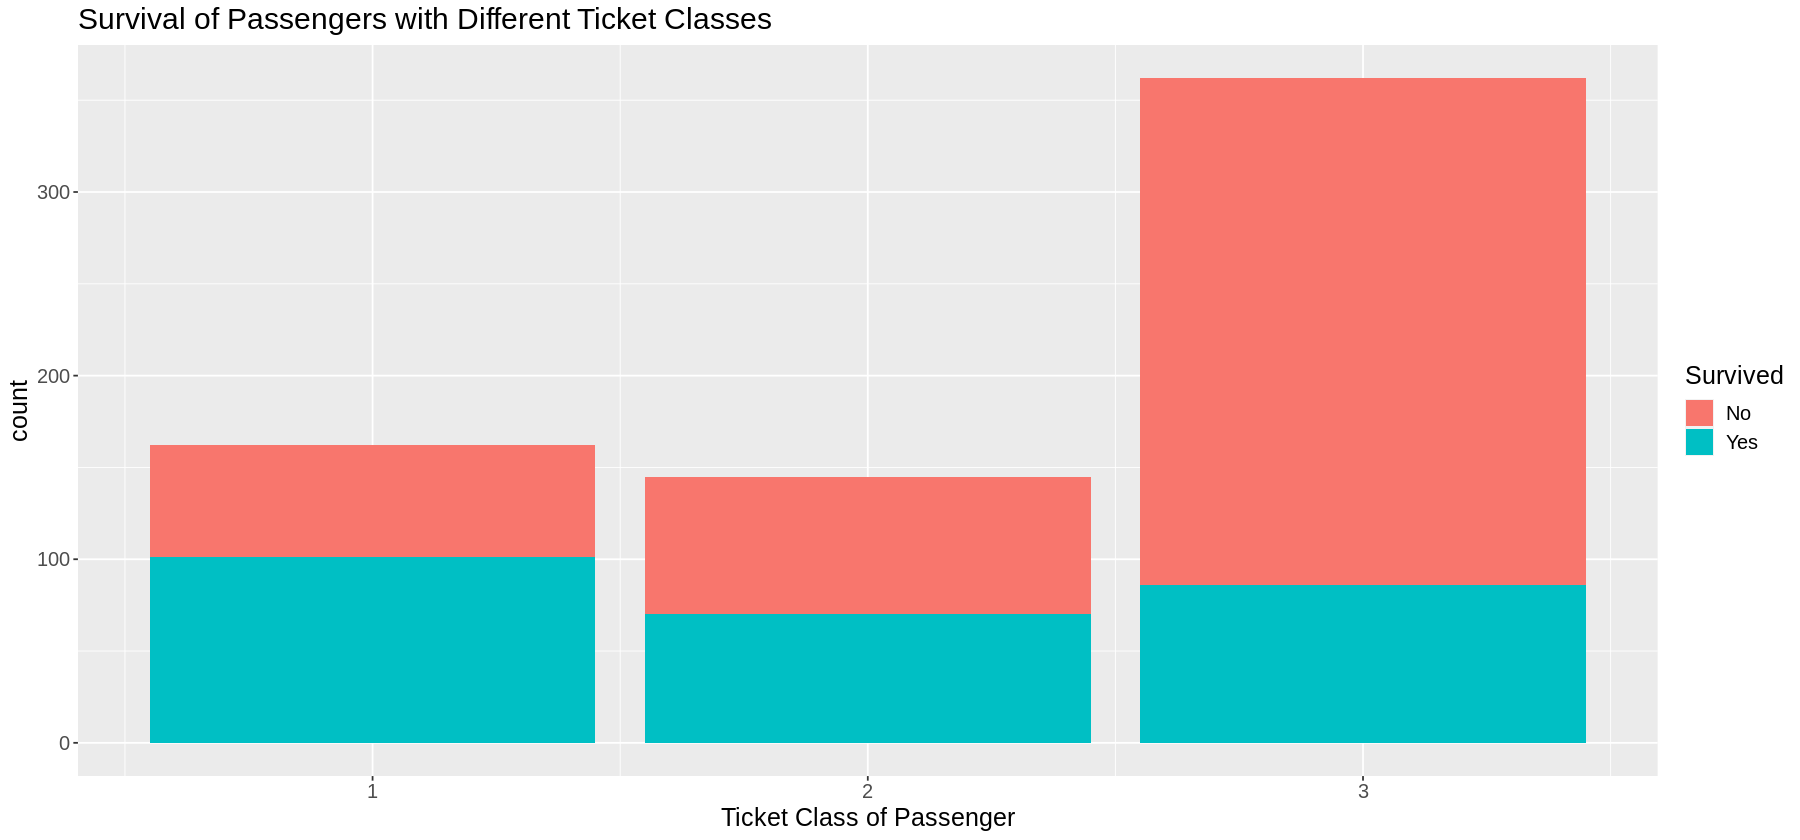

In [15]:
titanic_class_plot

*Figure 3: Survival of Passengers with different Ticket Classes*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 36 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 5 rows containing missing values (geom_bar).”


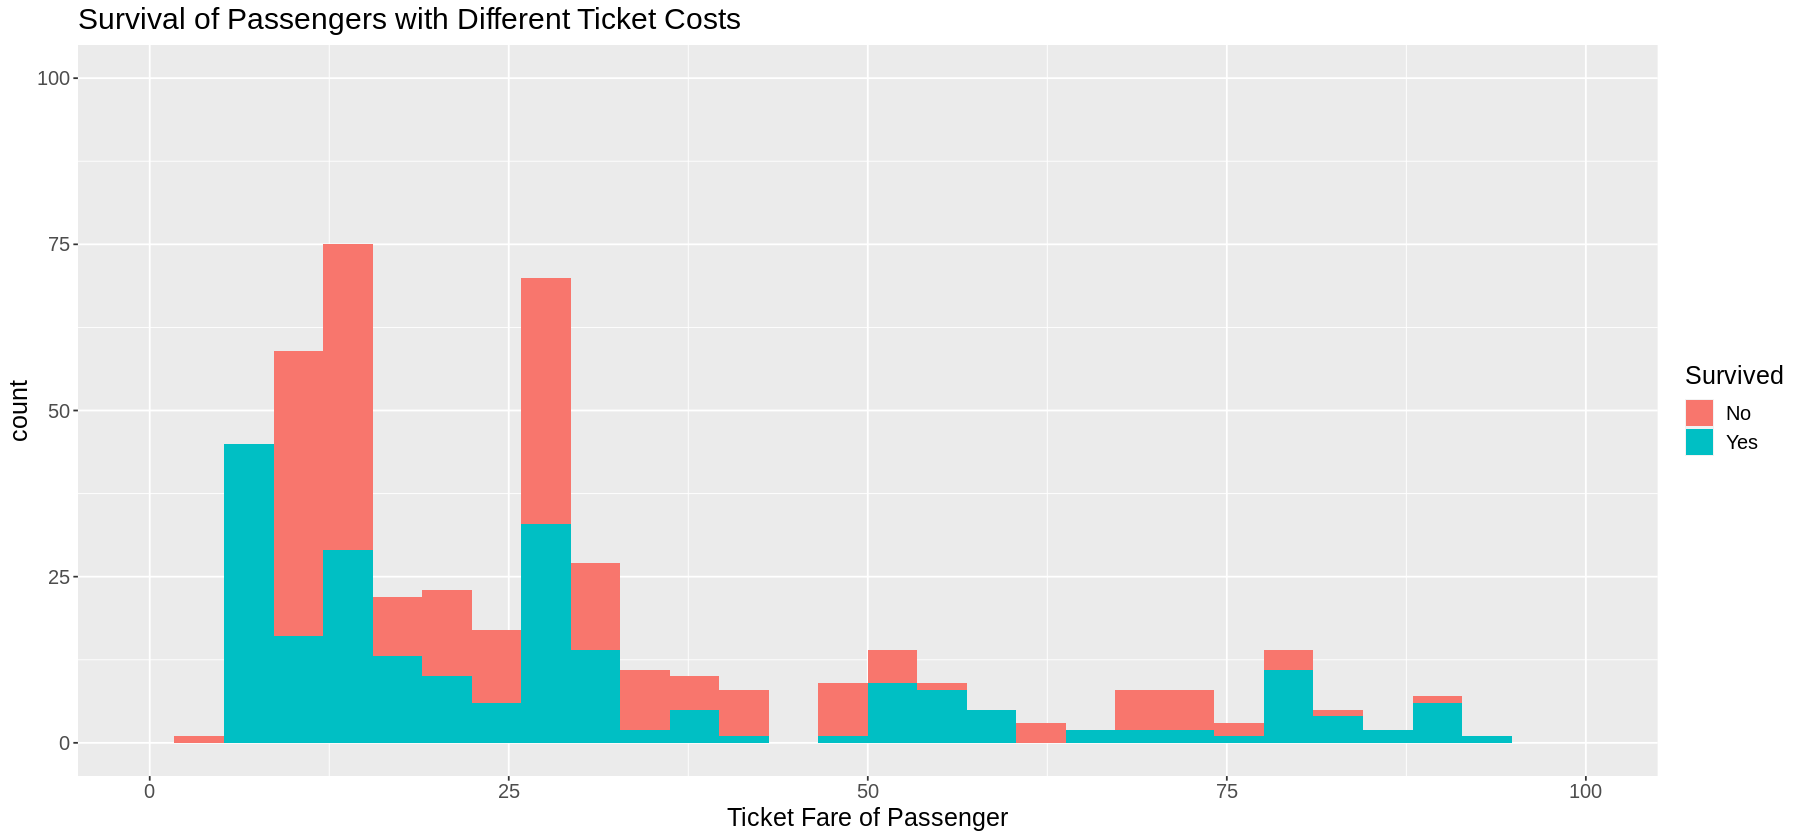

In [16]:
titanic_fare_plot

*Figure 4: Varying survivorship of Passengers who paid different ticket prices*

*Why we did this:* To visualize the survival rates of the factors we compared, we made plots for every individual factor, which can be seen above. Conclusions drawn from these plots are discussed in the discussion section.

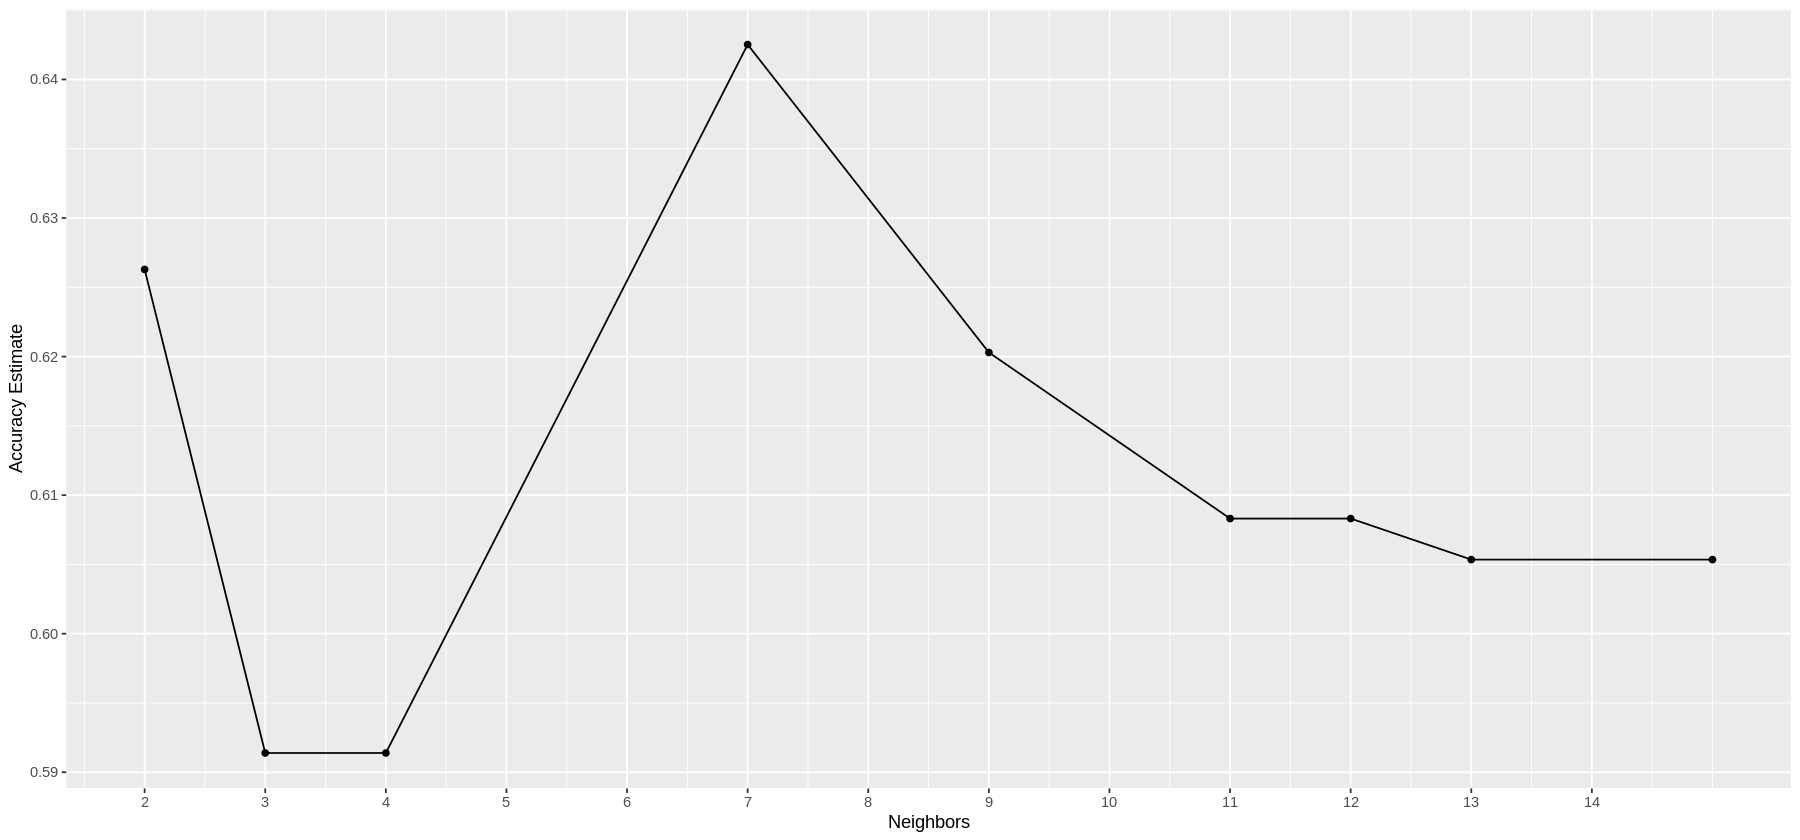

In [17]:
set.seed(1111)

titanic_recipe  <- recipe(Survived ~ Pclass, Age, Fare, data = titanic_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())


titanic_vfold <- vfold_cv(titanic_train, v = 5, strata = Survived)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")

knn_results <- workflow() %>%
      add_recipe(titanic_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = titanic_vfold, grid = 10) %>%
      collect_metrics()


accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) 

accuracy_versus_k

*Figure 5: Finding best K value based on highest accuracy*

*Why we did this:* We must set a seed so that our results are replicable. We tune our model and cross-validate our training data in order to find the best K value. For this project, we  used KNN Classification (K-nearest neighbours), and we needed a good K value to get the model with the highest accuracy. By cross-validating, we used several different subsets of our training data to test for different values of K. We used a 5-fold cross-validation. 

Next, we fitted our model with the K value we found from the cross-validation that yielded the highest accuracy. The accuracy versus K value plot was created to visually see which K value gave us the best accuracy. Once we founnd the K value, we used it to finally build the model in preparation for our testing set. In our case, the best K-value found was 7.


In [18]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7)%>%
       set_engine("kknn") %>%
       set_mode("classification")

titanic_fit <- workflow() %>%
          add_recipe(titanic_recipe) %>%
          add_model(knn_spec) %>%
          fit(data = titanic_train)

titanic_predictions <-  predict(titanic_fit, titanic_test) %>%
    bind_cols(titanic_test)

In [19]:
head(titanic_predictions)

.pred_class,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<fct>,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
No,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
No,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
No,9,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
No,14,No,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S
Yes,18,Yes,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S
No,19,No,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18.0000,,S


*Table 7a: Beginning of predicted results*

In [20]:
tail(titanic_predictions)

.pred_class,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<fct>,<int>,<chr>,<int>,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
No,871,No,3,"Balkic, Mr. Cerin",male,26,0,0,349248,7.8958,,S
Yes,875,Yes,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
No,877,No,3,"Gustafsson, Mr. Alfred Ossian",male,20,0,0,7534,9.8458,,S
No,878,No,3,"Petroff, Mr. Nedelio",male,19,0,0,349212,7.8958,,S
Yes,880,Yes,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
Yes,881,Yes,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S


*Table 7b: End of predicted results*

*Why we did this:*  This final step is crucial because we needed to assess how accurate our model was. This is where our testing set came in. We used the test set to see how well our model has performed. It also lets us know if we needed to make any adjustments, such as re-evaluating which predictor variables are most useful.

### *Discussion*  

From our data analysis, we see that individuals with a higher status (e.g. social class) based on the time period had a higher chance of surviving the Titanic. Those who were of younger age also had a higher chance of survival. All of which were what we expected to find. The findings of these tests are not particularly surprising, and align with the societal standards of the generation in which the event occurred. The Titanic happened during the U.S. Progressive Era, which was a time of reformation and social change within the country. During this time, a lot of corporate/government corruption was being revealed, which sparked social activism throughout the country (Britannica, 2019). Despite the efforts to bring balance in terms of social class, it is not surprising that higher status was still prioritized in terms of survival for passengers. Individuals of higher status were viewed as higher contributors to society, which allowed them to be viewed as priorities for survival. In terms of age, young leaders were on the rise during this era, so their priority comes as no particular surprise. For ticket fare, by looking at the graphs, we saw that the ratio of individuals who payed less and survived was lower than the ratio of individuals who paid more. However, looking at the predictor, the tail end does show that a drastic difference in ticket fare appears to imapct the likelihood of survival. Those we paid less than 10 dollars did not survive, but those who paid more than 20 dollars did survive. The head end, however, makes it look less specific to fare cost as there is fluxuation in survival. We believe that more research would need to be conducted to completely solidfy whether or not fare cost played a big role in survival likelihood.

Bringing it back to our proposed question — Does age and different social hierarchy characteristics impact your likelihood of surviving the titanic? — we can conclude that the characteristics we examined — age, social class, and social fare—did in fact impact your likelihood in surviving the Titanic.

These results would not only help those understand the politics and class ideologies on the Titanic, but also the societal norms at the time of the sinking. This can help historians in future generations understand the class, gender and age differences at the time in North America. This could lead to more in depth studies revolving around how we as humans prioritize some lives over others and the reasons behind that. It can also lead to more questions and studies delving into oppression and discrimination of lower class citizens, for example: would more citizens have survived if priority were given to saving everybody regardless of class? What does the preferential treatment of higher class individuals say about our society then versus now? If the Titanic were to occur again, would there still be classicism? 

*Note:*

An important thing we noticed while going through this project is that despite setting the seed, our accuracy estimator varied, which changed the graph and best K value. This occurred when we split up the cross validation model from the tuned model. We predict that this is because using two different cells changeed the way R read the code. Through trial and error, we realized that putting all the code in one cell gave our predictor the highest and most consistent accuracy.

### *References*

Britannica, T. Editors of Encyclopaedia (2020, September 28). Causes and Effects of 
   the Progressive Era. Encyclopedia Britannica. https://www.britannica.com/summary/Causes-and-Effects-of-the-Progressive-Era 

Britannica, T. Editors of Encyclopaedia (2020, September 28). The Progressive Era Key 
   Facts. Encyclopedia Britannica. 
   https://www.britannica.com/summary/The-Progressive-Era-Key-Facts 
   
Kaggle (2022). Titanic - Machine Learning from Disaster. https://www.kaggle.com/c/titanic.

N. O. A. A. (2018, July 10). National Oceanic and 
   Atmospheric Administration (NOAA) Home Page. NOAA Office of General Counsel. https://www.gc.noaa.gov/gcil_titanic-history.html#:~:text=The%20sinking%20of%20Titanic%20was,to%20improve%20safety%20of%20navigation  

Tikkanen, A. (2022, March 11). Titanic. Encyclopædia Britannica. 
   https://www.britannica.com/topic/Titanic   

